In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#load data and creating column titles
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
           
df = pd.read_csv('adult.csv', names=columns)
df.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Initial analysis and feature engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#appears to be no missing values but read that missing values are replaces with ? so find them 
df[(df.values.ravel() == "?").reshape(df.shape).any(1)]
df.isin(['?']).sum(axis=0)

age                  0
workClass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [5]:
#a lot of missing values in workClass, occupation and native-country so may delete thosebut for now just replacing with unknown - 
#see consider deleting after visulisation
df = df.replace('?', 'Unknown')

<AxesSubplot:xlabel='count', ylabel='workClass'>

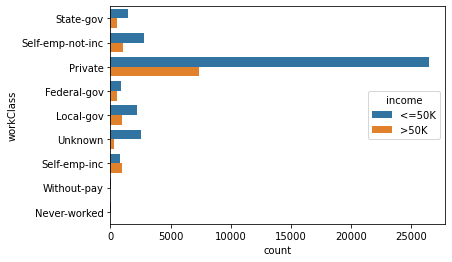

In [6]:
#looking at columns with a lot of missing data to see if still of interest
#even with big unknown quantity workClass is worth keeping
sns.countplot(y='workClass', hue='income', data = df)

In [7]:
#will group the gov groups
df.workClass.replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Gov', inplace=True)
df.workClass.value_counts()

Private             33906
Gov                  6549
Self-emp-not-inc     3862
Unknown              2799
Self-emp-inc         1695
Without-pay            21
Never-worked           10
Name: workClass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='occupation'>

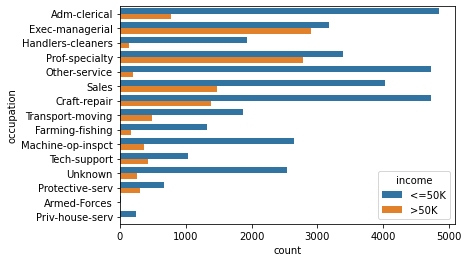

In [8]:
sns.countplot(y='occupation', hue='income', data = df)
#occupation still of interest with unknown section

<AxesSubplot:xlabel='count', ylabel='native-country'>

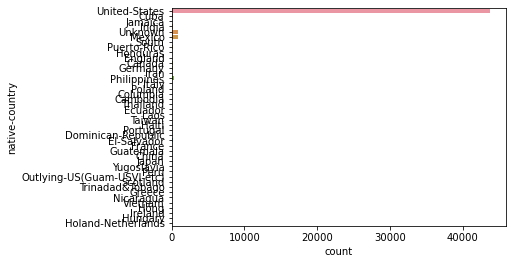

In [9]:
#checking range of countries
sns.countplot(y='native-country', data = df)

In [10]:
#vast majority in US and unkown is 3rd largest group so going to change into US and other
countries = df['native-country'].value_counts()
num = countries[:1].index
df['native-country'] = df['native-country'].where(df['native-country'].isin(num), 'other')
df['native-country'].value_counts()

United-States    43832
other             5010
Name: native-country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='race'>

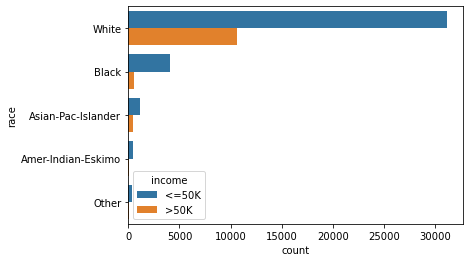

In [11]:
#checking range of race
sns.countplot(y='race', hue='income', data = df)

In [12]:
#vast majority in white so combining others
races = df['race'].value_counts()
num = races[:1].index
df['race'] = df['race'].where(df['race'].isin(num), 'Other')
df['race'].value_counts()

White    41762
Other     7080
Name: race, dtype: int64

In [13]:
#checking for duplicates - there are a few but could just be different ppl so will leave in
df.duplicated().sum()

56

In [14]:
#education is just string verson of education-num so deleting that
df['education'].value_counts()
df.drop(['education'], axis=1, inplace=True)

<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

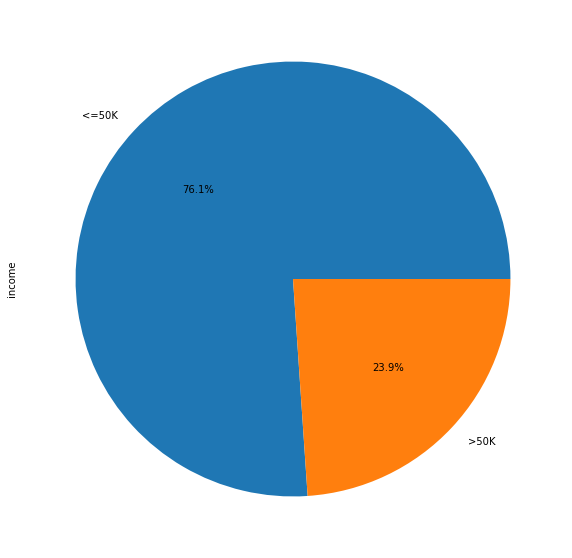

In [15]:
#pie chart of incomes
s = df['income'].value_counts()
print(s)
plt.figure(figsize=(16,10))
s.plot(kind='pie', autopct='%1.1f%%')

In [16]:
#making a numerical column for income
df['income_num'] = df['income']
df['income_num'] = (df.income == '>50K').astype(int)
df['income_num'].value_counts()

0    37155
1    11687
Name: income_num, dtype: int64

In [17]:
#general heatmap to look for areas of interest/correlation in numerical columns - shows very little
corr = df.corr()
sns.heatmap(corr, cmap='Purples', annot=True).set_title("Correlations")

#fnlwgt had very very low correlation with income_num so going to drop it
df.drop('fnlwgt', axis=1, inplace=True)

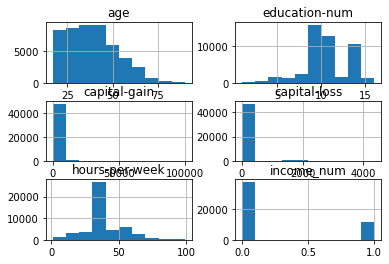

In [19]:
#general hist plot to give an idea of distribution etc
df.hist()
plt.show()

<AxesSubplot:xlabel='capital-diff', ylabel='count'>

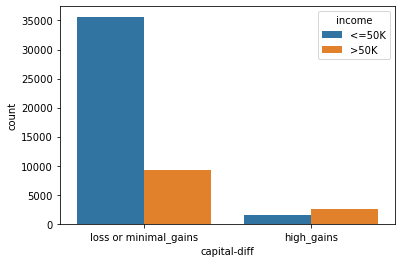

In [20]:
#capital gains and loss both heavily skewed so grouping into one column capital difference and grouping
df['capital-diff'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain', 'capital-loss'], axis = 1, inplace=True)

#binning into low and high gain
df['capital-diff'].max(), df['capital-diff'].min() #finding range
df['capital-diff']=pd.cut(df['capital-diff'], bins=[-5000, 500, 100000], right=True, labels=['loss or minimal_gains', 'high_gains'])
df['capital-diff'].value_counts()
sns.countplot(x='capital-diff', hue='income', data = df)

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

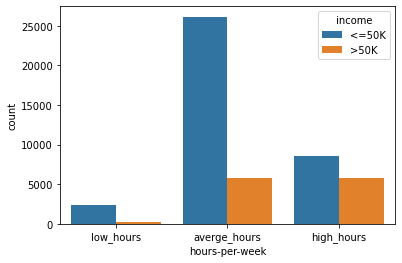

In [21]:
#hours per week also heavily skewed so grouping 
df['hours-per-week'].max(), df['hours-per-week'].min() #finding range
df['hours-per-week']=pd.cut(df['hours-per-week'], bins=[0, 19, 40, 100], right=True, labels=['low_hours', 'averge_hours', 'high_hours'])
df['hours-per-week'].value_counts()
sns.countplot(x='hours-per-week', hue='income', data = df)

<AxesSubplot:xlabel='sex', ylabel='count'>

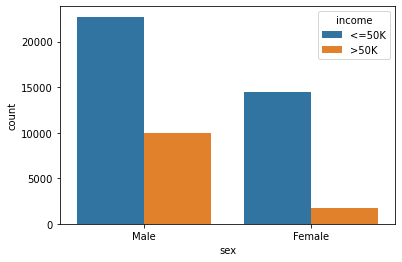

In [22]:
#looking at difference between the genders
sns.countplot(x='sex', hue='income', data = df)

In [23]:
#considered trying to combine this but will leave for now
df['marital-status'].value_counts(), df['relationship'].value_counts()

(Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
 Name: marital-status, dtype: int64,
 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
 Name: relationship, dtype: int64)

In [24]:
#finding numerical and catagorical data
num_data = df.select_dtypes(include=['int'])
print(f"Numerical data columns = {num_data.columns}")

cat_data = df.select_dtypes(include=['object'])
print(f"Catagorical data columns = {cat_data.columns}")

Numerical data columns = Index(['age', 'education-num', 'income_num'], dtype='object')
Catagorical data columns = Index(['workClass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'income'],
      dtype='object')


<AxesSubplot:xlabel='education-num', ylabel='count'>

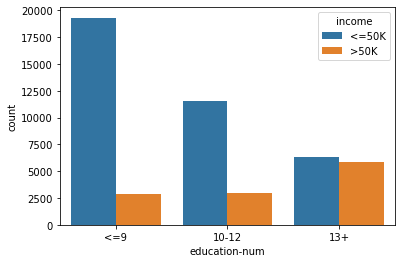

In [25]:
#grouping education
df['education-num'].value_counts(), df['age'].value_counts()
df['education-num']=pd.cut(df['education-num'], bins=[0, 9, 12, 16], right=True, labels=['<=9', '10-12', '13+'])
df['education-num'].value_counts()
sns.countplot(x='education-num', hue='income', data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

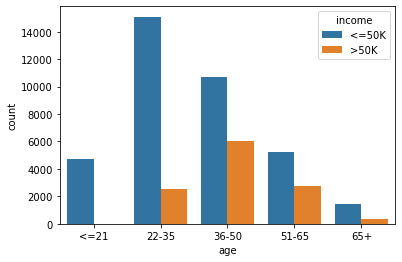

In [26]:
#grouping education age
df['age'].min(), df['age'].max()
df['age']=pd.cut(df['age'], bins=[0, 21, 35, 50, 65, 91], right=True, labels=['<=21', '22-35', '36-50', '51-65', '65+'])
df['age'].value_counts()
sns.countplot(x='age', hue='income', data = df)

In [27]:
#drop income and get_dummies of all cat data
df.drop('income', axis=1, inplace=True)
df = pd.get_dummies(data=df, columns=['workClass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'age', 'education-num', 'hours-per-week', 'capital-diff'])
df.head(2)

,income_num,workClass_Gov,workClass_Never-worked,workClass_Private,workClass_Self-emp-inc,workClass_Self-emp-not-inc,workClass_Unknown,workClass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,age_51-65,age_65+,education-num_<=9,education-num_10-12,education-num_13+,hours-per-week_low_hours,hours-per-week_averge_hours,hours-per-week_high_hours,capital-diff_loss or minimal_gains,capital-diff_high_gains
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


## Modelling

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop('income_num', axis=1)
y = df['income_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32724, 54), (16118, 54), (32724,), (16118,))

In [29]:
#imports
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [30]:
#method for getting the models
def get_models(): 
    models, names = list(), list()
    # DTC
    models.append(DecisionTreeClassifier())
    names.append('DTC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=100))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    # GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    return models, names

#test
get_models()

([DecisionTreeClassifier(),
  SVC(),
  BaggingClassifier(n_estimators=100),
  RandomForestClassifier(),
  GradientBoostingClassifier()],
 ['DTC', 'SVM', 'BAG', 'RF', 'GBM'])

In [31]:
# method to evaluate each model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#test with DTC
evaluate_model(X, y, DecisionTreeClassifier())

array([0.82456499, 0.82743091, 0.82698608, 0.83312858, 0.82350532,
       0.83251433, 0.82534808, 0.82248157, 0.82207207, 0.83681409,
       0.82845445, 0.8221085 , 0.82063882, 0.82985258, 0.82780508,
       0.81777232, 0.83230958, 0.82760033, 0.82964783, 0.82248157,
       0.82333675, 0.82763562, 0.82473382, 0.82678133, 0.82698608,
       0.82248157, 0.82862408, 0.83701884, 0.82739558, 0.82923833])

In [32]:
models, names = get_models()
results = list()

for i in range(len(models)):
    #fit models
    models[i].fit(X_train, y_train)
    # evaluate the model and store results
    scores = evaluate_model(X_test, y_test, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))


>DTC 0.818 (0.007)
>SVM 0.842 (0.007)
>BAG 0.825 (0.008)
>RF 0.828 (0.007)
>GBM 0.845 (0.008)


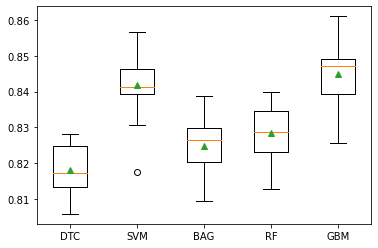

In [33]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Alternative method

In [35]:
import os
import requests

In [36]:
#method to get the dataset direct from website and create data file
def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

In [37]:
#get the data
urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"]
load_dataset('data', urls)

In [77]:
#make the dataframes
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('data/adult.data', names=columns, na_values='?')
test_data  = pd.read_csv('data/adult.test', names=columns, skiprows=1, na_values='?')

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
#getting numeric and catagorical columns
num_attributes = train_data.select_dtypes(include=['int'])
cat_attributes = train_data.select_dtypes(include=['object'])
print(f'Catagorical variables = {cat_attributes.columns}, Numerical variables = {num_attributes.columns}')

Catagorical variables = Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object'), Numerical variables = Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [78]:
#I wont redo all the visualisation but I will drop education and fnlwgt
train_data.drop(['education', 'fnlwgt'], axis=1, inplace=True)
test_data.drop(['education', 'fnlwgt'], axis=1, inplace=True)

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from pandas.api.types import CategoricalDtype

In [43]:
#method to select the num and cat data columns and apply fit & transform
class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

In [44]:
#pipeline to select and scale numerical data
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int')),
    ("scaler", StandardScaler())
])

In [45]:
#class to get dummies etc on cat data
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
  def __init__(self, dropFirst=True):
    self.categories=dict()
    self.dropFirst=dropFirst
    
  def fit(self, X, y=None):
    join_df = pd.concat([train_data, test_data])
    join_df = join_df.select_dtypes(include=['object'])
    for column in join_df.columns:
      self.categories[column] = join_df[column].value_counts().index.tolist()
    return self
    
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = X_copy[column].astype({column:CategoricalDtype(self.categories[column])})
    return pd.get_dummies(X_copy, drop_first=self.dropFirst)

In [46]:
#catagorical pipeline to select and encode cat data
cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(type='object')),
    ("encoder", CategoricalEncoder(dropFirst=True))
])

In [47]:
#feature union to combine the 2 pipelines
full_pipeline = FeatureUnion([("num_pipe", num_pipeline), 
                ("cat_pipeline", cat_pipeline)])

In [48]:
#create train and test
train_copy = train_data.copy()
train_copy["income"] = train_copy["income"].apply(lambda i: 0 if i==' <=50K' else 1)
X_train = train_copy.drop('income', axis =1)
Y_train = train_copy['income']

In [49]:
#put x_train to pipeline
X_train_processed=full_pipeline.fit_transform(X_train)
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
model.fit(X_train_processed, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [81]:
#test model
test_copy = test_data.copy()
test_copy["income"] = test_copy["income"].apply(lambda x: 0 if x==' <=50K.' else 1)
X_test = test_copy.drop('income', axis =1)
Y_test = test_copy['income']

not going to be great results as didn't do the cleaning on this set - its just for technique notes

In [83]:
#apply to test dataset and get accuracy score
X_test_processed = full_pipeline.fit_transform(X_test)
predicted_classes = model.predict(X_test_processed)

accuracy_score(predicted_classes, Y_test.values)

0.8527117498925127

Text(33.0, 0.5, 'Actual classes')

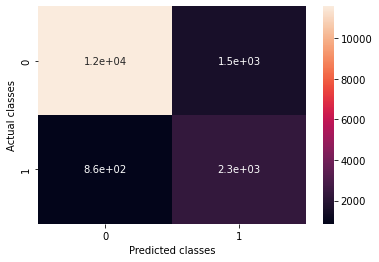

In [84]:
#confusion matrix
cfm = confusion_matrix(predicted_classes, Y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [85]:
#cross val
cross_val_model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
scores = cross_val_score(cross_val_model, X_train_processed, 
         Y_train, cv=5)
print(np.mean(scores))

0.8518166841520134


In [89]:
#grid search

# penalty specifies the norm in the penalization
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)

random_state=[0]

# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, random_state=random_state)

clf = GridSearchCV(estimator = model, param_grid = hyperparameters, cv=5)
best_model = clf.fit(X_train_processed, Y_train)
print('Best Penalty:', best_model.best_estimator_.get_params() ['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

C:\Users\catri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\catri\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\catri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\catri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best Penalty: l2
Best C: 1.0


In [90]:
#predictiong best model
best_predicted_values = best_model.predict(X_test_processed)
accuracy_score(best_predicted_values, Y_test.values)

0.8527117498925127

In [ ]:
#save model with pickle:
#filename = 'final_model.sav'
#pickle.dump(model, open(filename, 'wb'))

#how to load model from pickle:
#saved_model = pickle.load(open(filename, 'rb')) 